In [16]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import os

In [17]:
root_path = './'
methods = ['fedcls_vanilla', 'fedpet_avg', 'fedpet_voting_avg']
colors = ['g', 'r', 'b', 'y', 'purple','k', 'olive','cyan']

sampled_data = 10
clients_in_total = 10
clients = 5
iter = 100

log_paths = []
csv_paths = []
for method in methods:
    log_paths.append(os.path.join(root_path, 'log_' + method + '_' + str(sampled_data) + '_' + str(clients_in_total) + ".log"))
    csv_paths.append(os.path.join(root_path, method + '_' + str(sampled_data) + '_' + str(clients_in_total) + ".csv"))

In [18]:
for i in range(len(methods)):
    print(log_path)
    method = methods[i]
    log_path = log_paths[i]
    phrase = 'modeling - /data/cdq/pet/' + 'log_' + method + '_' + str(sampled_data) + '_' + str(clients_in_total)
    with open(log_path) as f:
        f = f.readlines()
    df = pd.DataFrame(data=None,index = range(iter), columns = range(clients))

    for line in f:
        if phrase in line:
            print(line)
            gen = int(re.findall(r'/g(.+?)/',line)[0])
            client = int(re.findall(r'client(.+?)',line)[0])

            score_line = f[f.index(line)+2]
            acc = float(re.findall(r':?(\d+\.\d+)',score_line)[0])
            df[client][gen]=acc
    df.to_csv(csv_paths[i])

    print(df)


./log_fedpet_voting_avg_10_10.log
2022-08-15 17:10:30,815 - INFO - modeling - /data/cdq/pet/log_fedcls_vanilla_10_10/g0/client0

2022-08-15 17:13:22,271 - INFO - modeling - /data/cdq/pet/log_fedcls_vanilla_10_10/g0/client1

2022-08-15 17:16:13,154 - INFO - modeling - /data/cdq/pet/log_fedcls_vanilla_10_10/g0/client2

2022-08-15 17:19:06,933 - INFO - modeling - /data/cdq/pet/log_fedcls_vanilla_10_10/g0/client3

2022-08-15 17:21:59,422 - INFO - modeling - /data/cdq/pet/log_fedcls_vanilla_10_10/g0/client4

2022-08-15 17:25:10,032 - INFO - modeling - /data/cdq/pet/log_fedcls_vanilla_10_10/g1/client0

2022-08-15 17:28:11,790 - INFO - modeling - /data/cdq/pet/log_fedcls_vanilla_10_10/g1/client1

2022-08-15 17:31:38,300 - INFO - modeling - /data/cdq/pet/log_fedcls_vanilla_10_10/g1/client2

2022-08-15 17:34:35,169 - INFO - modeling - /data/cdq/pet/log_fedcls_vanilla_10_10/g1/client3

2022-08-15 17:37:31,316 - INFO - modeling - /data/cdq/pet/log_fedcls_vanilla_10_10/g1/client4

2022-08-15 17:40

fedcls_vanilla
[0 0 0 0 0] [0.25026316 0.25039474 0.25052632 0.25039474 0.25026316]
[1 1 1 1 1] [0.25039474 0.25026316 0.25039474 0.25052632 0.25039474]
[2 2 2 2 2] [0.25039474 0.25078947 0.24986842 0.25026316 0.25039474]
[3 3 3 3 3] [0.24973684 0.25013158 0.25013158 0.25026316 0.24986842]
[4 4 4 4 4] [0.25052632 0.24960526 0.24986842 0.24973684 0.24973684]
[5 5 5 5 5] [0.24960526 0.24907895 0.24986842 0.25013158 0.24934211]
[6 6 6 6 6] [0.25       0.24973684 0.25       0.24973684 0.24960526]
[7 7 7 7 7] [0.25026316 0.24921053 0.24973684 0.24907895 0.24934211]
[8 8 8 8 8] [0.24986842 0.24973684 0.24934211 0.25118421 0.24960526]
[9 9 9 9 9] [0.24947368 0.25131579 0.25       0.24947368 0.24986842]
[10 10 10 10 10] [0.25       0.25013158 0.25078947 0.25       0.25513158]
[11 11 11 11 11] [0.25065789 0.25039474 0.24973684 0.25026316 0.25355263]
[12 12 12 12 12] [0.25197368 0.25       0.25013158 0.25855263 0.25263158]
[13 13 13 13 13] [0.26355263 0.25276316 0.25013158 0.25026316 0.25197368]

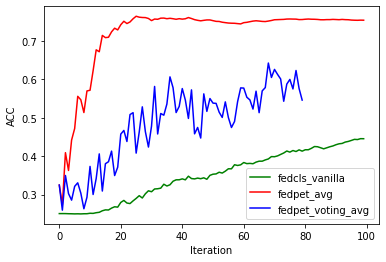

In [19]:
fig = plt.figure()
plt.xlabel('Iteration')
plt.ylabel('ACC')

methods_shown = ['fedcls_vanilla', 'fedpet_avg', 'local_pet', 'fedpet_voting_avg_3','local_pet_2']# 
labels = ['fedcls_vanilla', 'fedpet_avg', 'local_pet', 'local_pet_augment', 'fed_pet_avg_augment'] # 
label_idx = 0
# ['fedcls_vanilla', 'fedpet_avg', 'fedpet_voting', 'fedpet_voting_avg', 'local_pet', 'fedpet_voting_avg_2', 'local_pet_2', 'fedpet_voting_avg_3']

for i in range(len(methods)):
    print(methods[i])
    # if methods[i] in methods_shown:
    #     pass
    # else:
    #     continue
    csv_path = csv_paths[i]
    df = pd.read_csv(csv_path,index_col=0)
    y_mean = []
    for j in range(iter):
        # if j > 20:
        #     break
        x = np.array([j]*5)
        y = np.array(df.iloc[j])
        print(x,y)
        y_mean.append(pd.DataFrame(y).dropna().mean())
        # plt.scatter(x, y,color=colors[i]) 
    plt.plot(range(iter),y_mean,color=colors[i],label=methods[i])
    # plt.plot(range(iter),y_mean,color=colors[i],label=labels[label_idx])
    label_idx = label_idx + 1


plt.legend()

plt.savefig('exp6.pdf')
plt.show()